# **Retail Sales Prediction**- ML project

**Project type** - Regression

**Contribution** - Individual

**By** - Mahima Lakra

# **Project Summary**
The Dataset contain data from Rossmann store, which operates in over 3000 drug stores in European Countries. Rossmann stores data will be used to train a model which will be able to predict sales in future based on current and previous sales data.

The following topics will be used in this project:
Analysis of data using Exploratory Data Analysis. Using univariate, Bivariate and multivariate analysis along with moving checking seasonalities in Rossmann dataset. After which Regression Analysis will be performed using Linear Regression, Lasso Regression, Ridge Regression and Elastic-Net Regression(combination of Lasso and Ridge Regression)

# **Github Link : -**
https://github.com/Mahima1akra/Retail-Sales-Prediction---ML-model-Linear-Regression-.git

### **Link to datasets used:**
https://drive.google.com/file/d/1SRYyYnSxYQ3FkZCWIdpiKTOxdxPZl2jJ/view?usp=sharing

https://drive.google.com/file/d/1DT9QX1moFz_ibQ-sMVsQ2pdKnzOTA4uV/view?usp=sharing

# **Problem Statement : -**

Rossmann operates in over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influence by many factors including promotions, competitions, school and state holidays, seasonalities and localities. With thousands of individual managers predicting sales based on thier unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forcast the "Sales" column for the test set.

Note : - Some stores in the dataset were temporarily closed for refurbishment.

# **Data Description**

**Rossmann Stores data.csv** - Contains historical store data

**Store.csv** - Contains supplement information about the store
The following are the fields in the datasets:

*   **Id**- Unique entry ID.
*   **store** - Contians the ID of different store.
*   **Sales** - Sales made on a particular day.
*   **Customers** - Number of customers for a given day.
*   **Open** - An indicator if the store is open(1) or closed(0).
*   **StateHoliday** - Indicates if there is a State Holiday or not. a = public holiday, b = Easter Holiday, c = Christmas, 0 = None.
*   **SchoolHoliday** -Indicates school holiday or not.
*   **StoreType** - different type of store. There are four basic type here i.e. a,b,c,d.
*   **Assortment** - Type of assortment level. a = basic, b = extra, c = extended.
*   **CompititionDistance** - Distance from the nearest compitition mentioned in month and year format.
*   **Promo** - indicates if the store is running promotion or not.
*   **Promo2** - indicates if store is running consecutive promotion or not.
*   **Promo2Since[Year/Week]** - describes the year and calender week since the day store started Promo2.
*   **PromoInterval** - contains the months in which the Promotions start.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Rossmann dataset
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Cohort Berlin/Capstone projects/Capstone project 2- Retail sales prediction(Regression)/Rossmann Stores Data.csv")
# Store data
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Cohort Berlin/Capstone projects/Capstone project 2- Retail sales prediction(Regression)/store.csv")

<ipython-input-4-69b22d2e1b48>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Cohort Berlin/Capstone projects/Capstone project 2- Retail sales prediction(Regression)/Rossmann Stores Data.csv")


### Dataset First View

In [ ]:
# Looking into sales dataset from starting of the column
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Getting datatype and column informations
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Looking into sales dataset from end of the columns
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Getting a count of all holidays in StateHoliday column
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Checking for null values in sales_df
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Getting info onn store_df
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Cheking for null values in store_df
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# **Data Wrangling**

In [ ]:
# Checking unique values in some columns
x = ["DayOfWeek", "StateHoliday", "SchoolHoliday"]

for i in x:
  print(f"{i} has {sales_df[i].unique()} values")

DayOfWeek has [5 4 3 2 1 7 6] values
StateHoliday has ['0' 'a' 'b' 'c' 0] values
SchoolHoliday has [1 0] values


In [ ]:
# Unique values in store_df
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
# Filling values in compition and promotions columns
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [ ]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
final1 = pd.merge(sales_df, store_df, on = 'Store', how ='left')

In [ ]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
final1.duplicated().sum()

0

In [ ]:
# Changing datatype from object to int type
final1.loc[final1['StateHoliday'] == '0' , 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a' , 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b' , 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c' , 'StateHoliday'] = 3

# Storing the name of the column same as the StateHoliday
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy = False)

In [ ]:
# changing the datatype from object to int
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2

# storing the name of the column same as the Assortment
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

In [ ]:
# changing the datatype from object to int
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3

# storing the value with same column name
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

In [ ]:
final1[['StateHoliday', 'Assortment', 'StoreType']].nunique()

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# Changing date related columns from object type to datetime format
final1['Date'] = pd.to_datetime(final1['Date'], format = '%Y-%m-%d')
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
# Changning columns with float datatype containing counter values to int type
final1['CompetitionOpenSinceYear'] = final1['CompetitionOpenSinceYear'].astype(int)
final1['CompetitionDistance'] = final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek'] = final1['Promo2SinceWeek'].astype(int)
final1['Promo2SinceYear'] = final1['Promo2SinceYear'].astype(int)

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

# **Understanding Your Variables**

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
# Getting a simple statistical view of the dataset
final1.describe().apply(lambda x: round(x,2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


# **EDA by looking into Data Vizualizations**

## CompetitionOpenSinceYear Vs Sales

Text(0.5, 1.0, 'Competition Vs Sales')

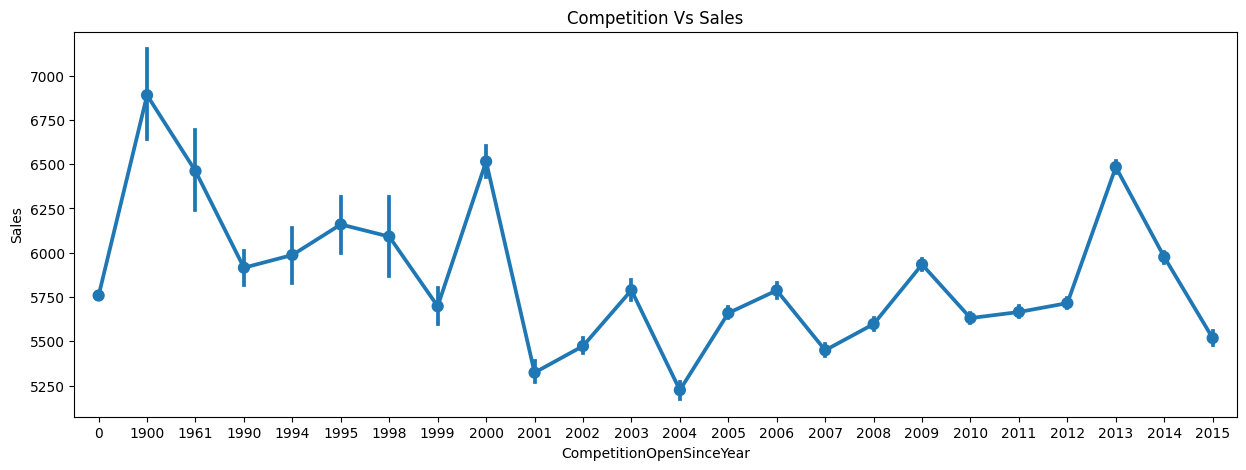

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'CompetitionOpenSinceYear' , y = 'Sales', data = final1)
plt.title('Competition Vs Sales')

## Observation:
It can be seen that Sales is highest in the year 1900 and is decreasing ever since till the the point after year 2005 it seems to grow in a slower pace or one can say it is stable, although there there are fluctuations in sales year on year which is quite natural in real world sales projections.

#### Probable Explanation:
It is possible that in the year 1900 till 2000 there was less competition which could explain high sales projections but over the years there are more competitors in the market and after 2005 since the sales on average over years are relatively stable it is possible they have made quite a good reputation.

## Promo2SinceYear Vs Sales

Text(0.5, 1.0, 'Promo 2 Since Year Vs Sales')

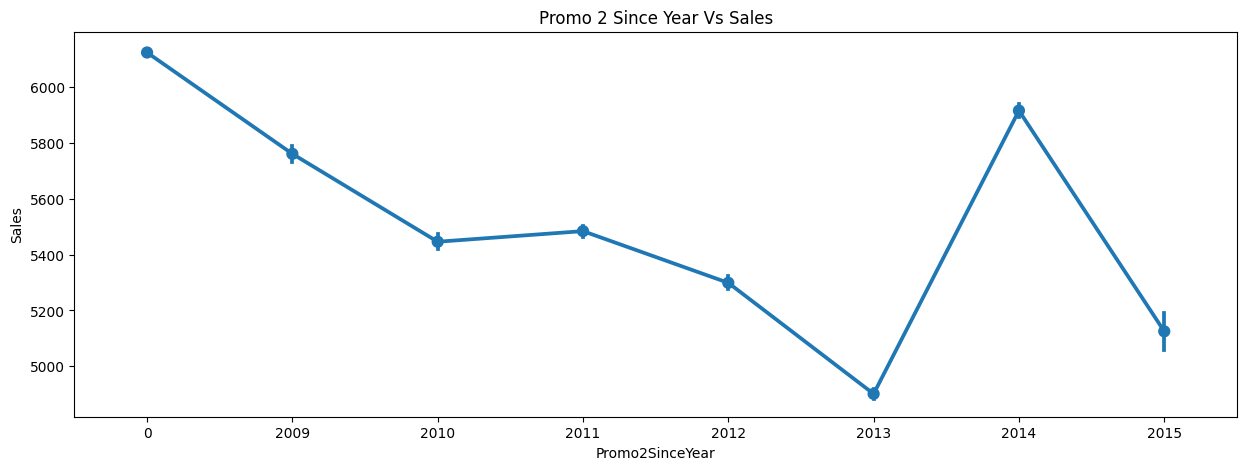

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'Promo2SinceYear', y = 'Sales', data = final1)
plt.title('Promo 2 Since Year Vs Sales')

## Observation:
It can be seen that Sales has been decreasing over the years with respect to promotion which is not a good indicator, although there is a change in 2014 and a deeper analysis needs to be done on promotion stratergy.

Promotion stratergy needs to be addressed which can improve sales of the Rossmann Stores.

## DayOfWeek Vs Sales

Text(0.5, 1.0, 'Day Of Week Vs Sales')

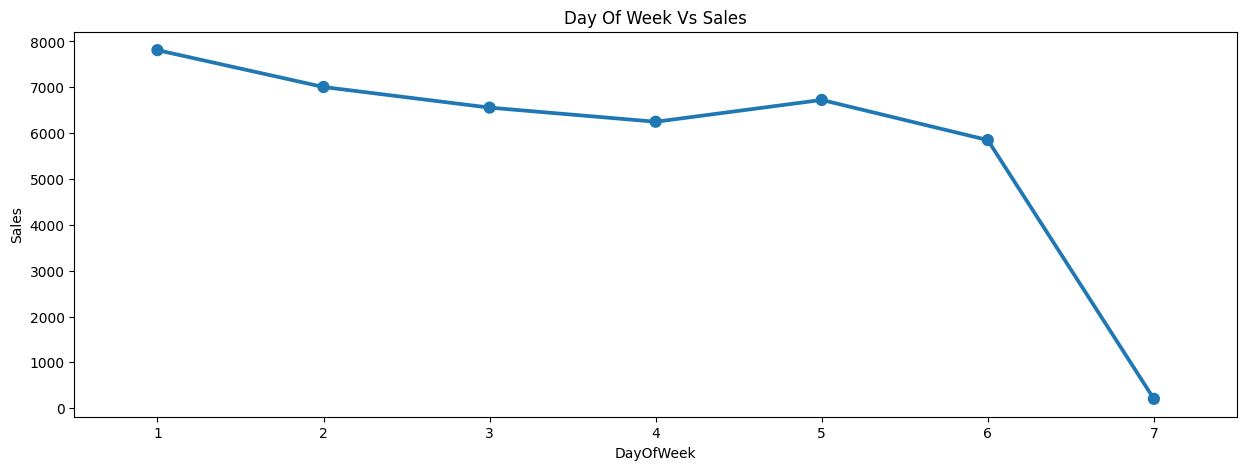

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'DayOfWeek', y = 'Sales', data = final1)
plt.title('Day Of Week Vs Sales')

## Observation:
It can be seen that the stores are having highest sales on Day 1 of the week i.e. Monday and gradually decreasing till on Day 7 where it is zero.

### Possible Reason:
It is possible that the store remains close on Sundays which is why there is zero sales on Day 7 and when the week starts there is a high traffic. It is also possible people tend to buy and stock up their supplies for the whole week from Rossmann store at the begining of the week which is why there is a higher number in the begining.

## CompetitionOpenSinceMonth Vs Sales

Text(0.5, 1.0, 'Competition Open Since Month Vs Sales')

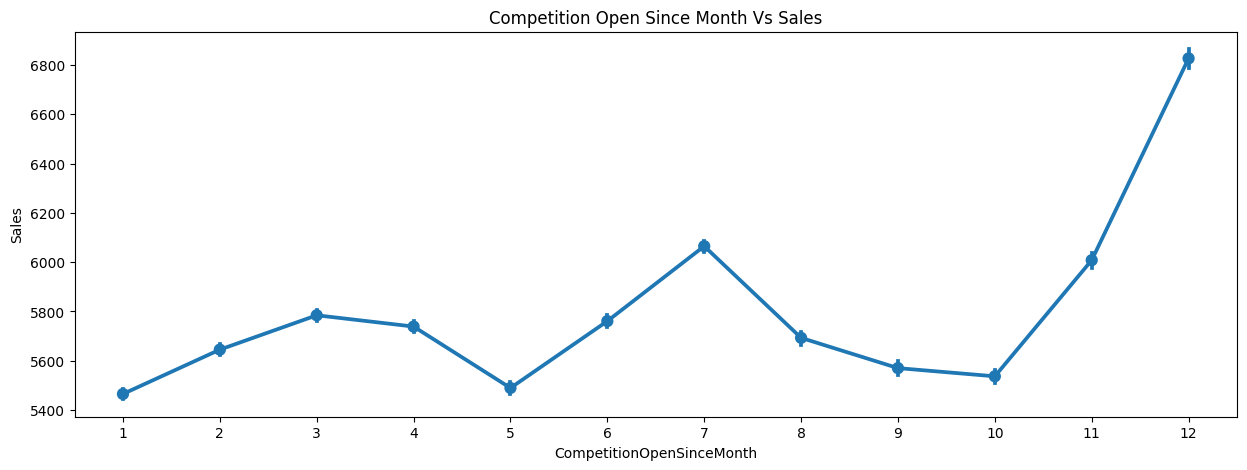

In [ ]:
plt.figure(figsize = (15,5))
sns.pointplot(x = 'CompetitionOpenSinceMonth', y = 'Sales', data = final1)
plt.title('Competition Open Since Month Vs Sales')

## Observatio:
It seems that the sales tend to increase as the number of months since competition arrives increases, there are some high and low points as well in the graph so a little more data needs to be collected to get a better result.

## Store Type Vs Sales Plot

Text(0.5, 1.0, 'Store type Vs Sales plot')

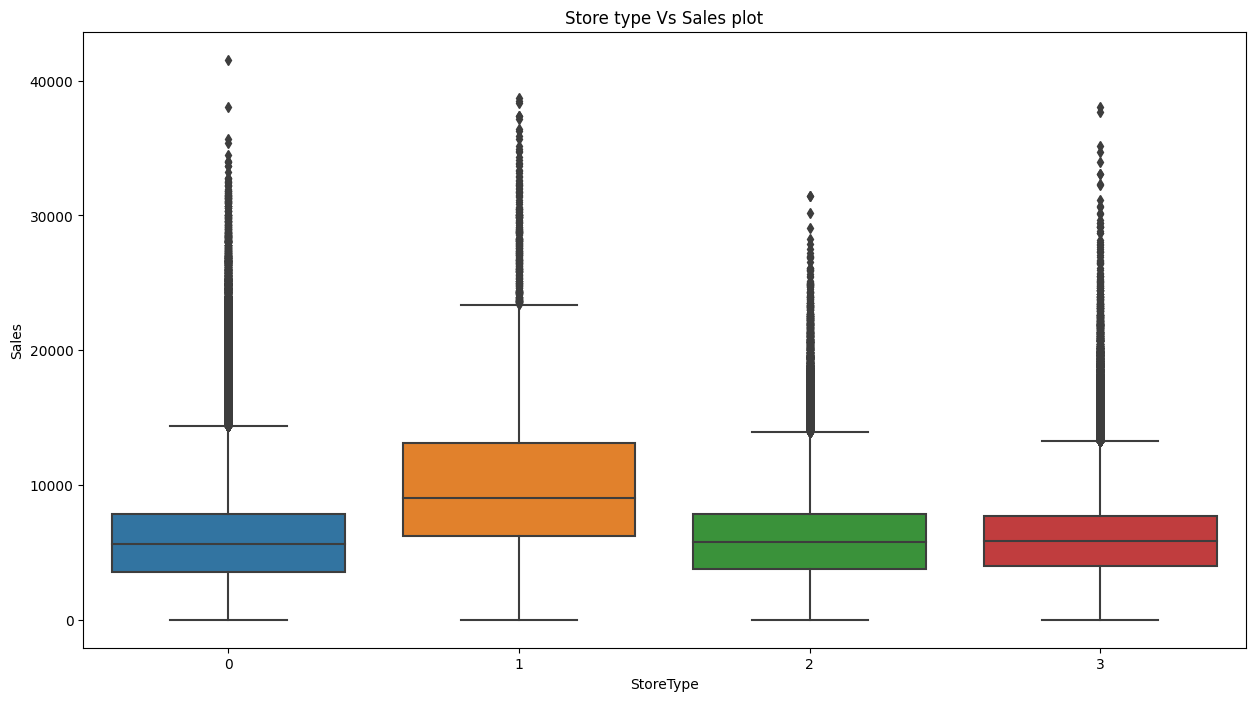

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'StoreType', y = 'Sales', data = final1)
plt.title('Store type Vs Sales plot')

## Observation:
We can see that that store type 1 has a relatively higher median value in terms of sales.

## Assortment Vs Sales

Text(0.5, 1.0, 'Assortment Vs Sales Plot')

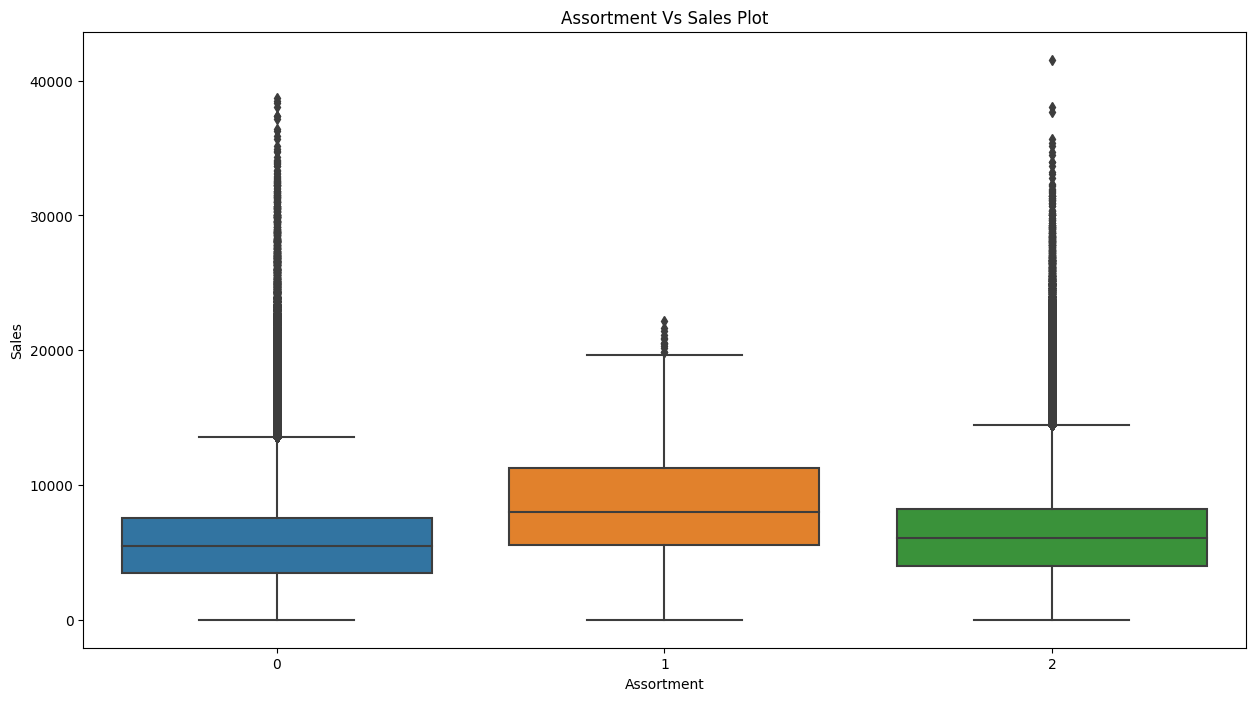

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Assortment Vs Sales Plot')

## Observation:
Assortment Type two has a relatively higher median and less data which fall out of its interquartile range.

## Number of days the Stores remain open

Text(0.5, 1.0, 'Number of Days store remain open')

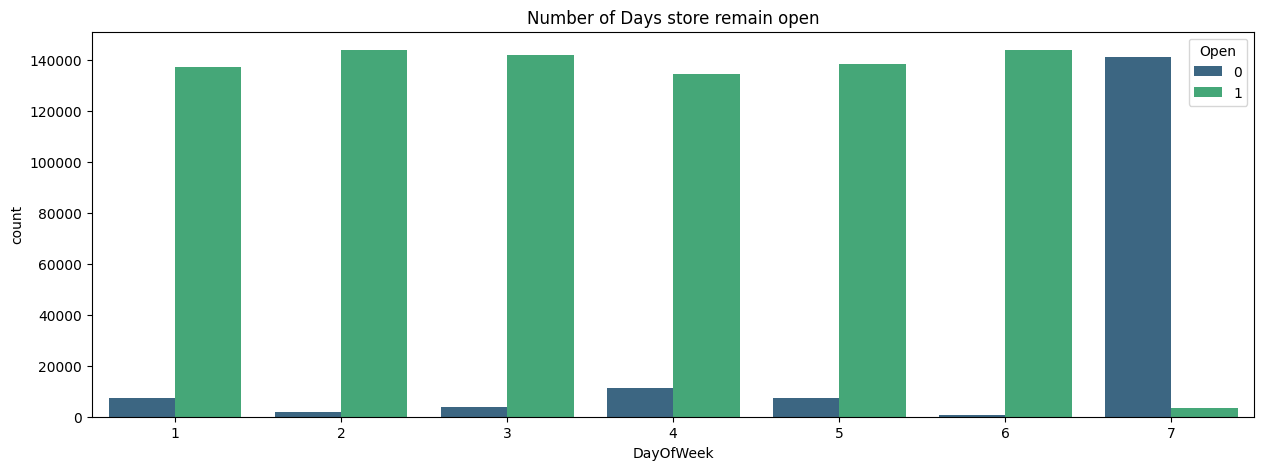

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = final1, palette = 'viridis')
plt.title('Number of Days store remain open')

## Observation:
Stores remain open everyday except on Sunday i.e. Day 7 where only a few of the stores remain open.

## Days of store promo in a week

Text(0.5, 1.0, 'Promotions done by Stores in a week')

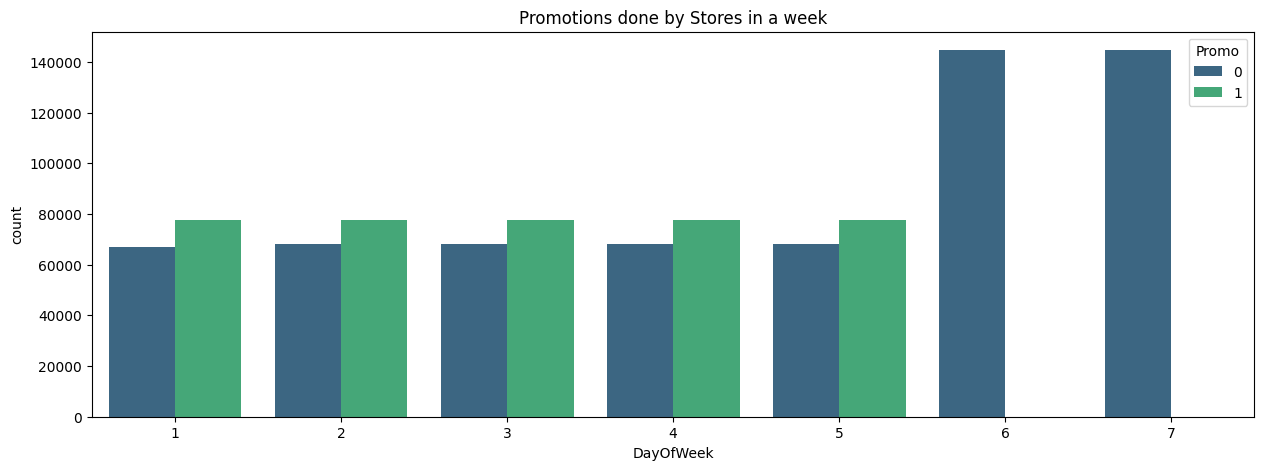

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'DayOfWeek', hue = 'Promo', data = final1, palette = 'viridis')
plt.title('Promotions done by Stores in a week')

## Observation:
Promotions seems to be done in week days and not on weekends. Saturday is indicated by day 6 and Sunday indicated by Day 7.

## Promotions Vs Sales

Text(0.5, 1.0, 'Promotions Vs Sales count')

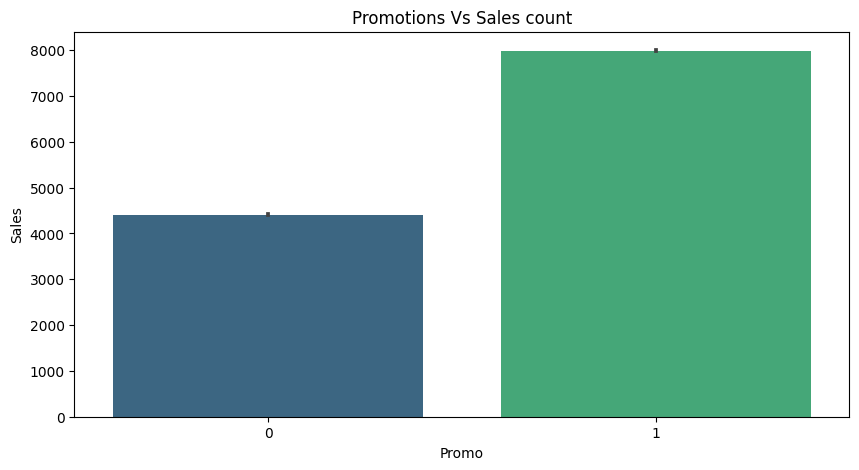

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Promo', y = 'Sales', data = final1, palette = 'viridis')
plt.title('Promotions Vs Sales count')

## Observation:
It seems that with promotions done the sales also increases. There is also static sales which could be from mouth to mouth promotions or the Stores having made a reputation. Here 0 is for no promotions and 1 is for Poromotions done.

## State Holiday Vs Sales

0 = Public Holiday

1 = Easter Holiday

2 = Christmas Holiday

3 = None

Text(0.5, 1.0, 'State Holidays with sales count')

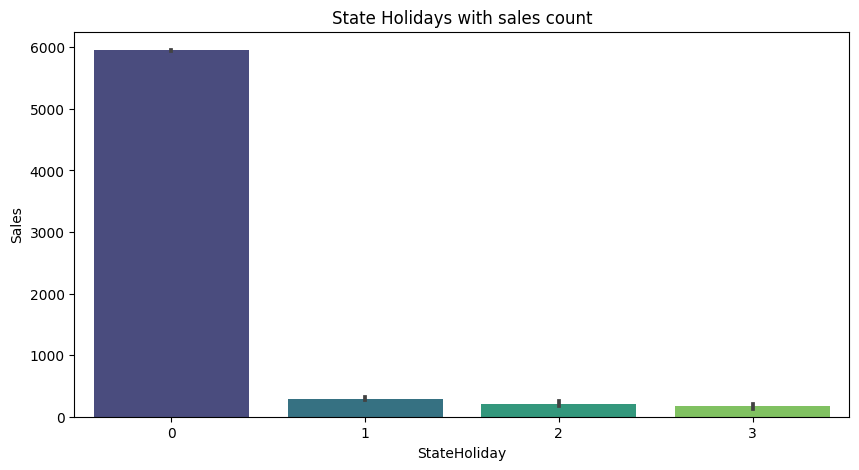

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'StateHoliday', y = 'Sales', data = final1, palette = 'viridis')
plt.title('State Holidays with sales count')

## Observation:
Sales are high on public holidays and are not changed much when it comes to other holidays.

### Possible reason:
On holidays other than Public people probably tend to go on vaccations which is why Sales are low on non-public holiday.

## School Holiday
0 = 'Not Holiday'

1 = 'Holiday'

Text(0.5, 1.0, 'School holiday Vs Sales count')

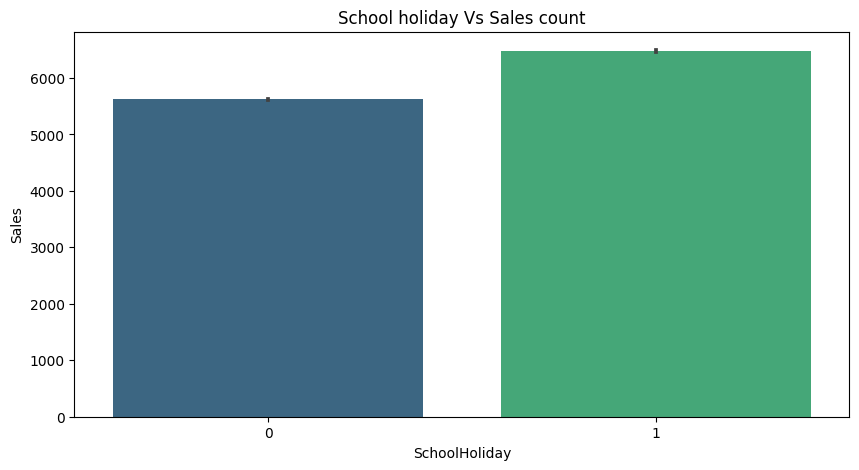

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = final1, palette = 'viridis')
plt.title('School holiday Vs Sales count')

## Observation:
Sales are relatively higher on School Holidays.

### Possible reason:
Sales are relatively higher on school holiday which could be related  by number of customer increase on those days.

# **Conclusion of EDA**

*   CompetitionOpenSinceYear Vs Sales graph shows that the sales have remained relativly over the year since year 2001 and on, although they are not as high as they used to before that.
*   Sales Vs Day of week graph shows that sales are high in the begining of the week which could be because they are working days and people tend to go to stores when are out on their business. Sales are 0 on Sunday which could mean stores are closed.
*   Sales are high on the months of July, November and December as seen from Competition Open since months and sales graph. The graph is also low at some points in some months which could be addressed by either having seasonal items or other measures.
*   StoreType 'b' has a relatively higher median value which could indicate the sales are relatively more in these stores.
*   Assortment type 'b' has a relatively higher sales. They could be linked to Store type.
*   Most stores remain closed on Sundays(day 7) and Promo on Saturday and sunday are low to none.
*   Promotions by store and sales have a strong relationship, where stores with promotions have higher sales.
*   Holidays also have a direct relation with the sales. On public holidays sales are more and on School holidays as well. This could be because of the increase in available time of the customers.






# **Feature Engineering and Data-Preprocessing**

<ipython-input-42-84d25916ed91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(final1.corr()), cmap="YlGnBu", annot=True, fmt=".2f")


<Axes: >

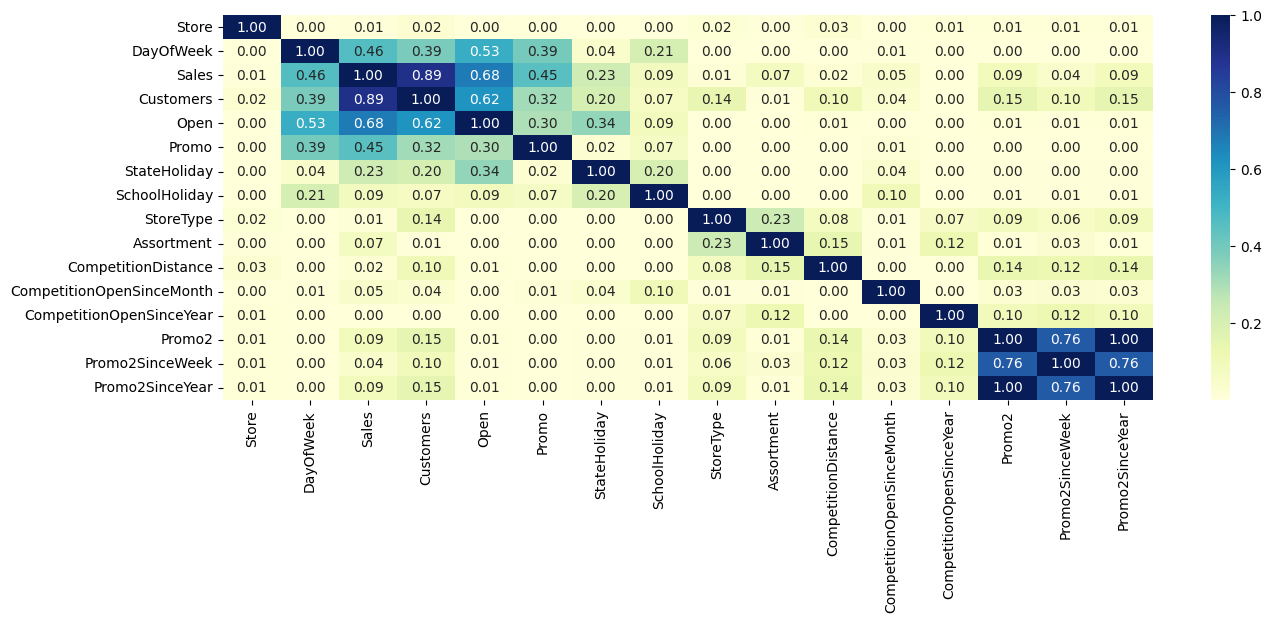

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(abs(final1.corr()), cmap="YlGnBu", annot=True, fmt=".2f")

Here the intensity of colour shows the strong correlation between different featrue, a strong blue shows strong correlation between those two variable and a lighter yellow colour shows little to none correlation. Here Absolute value is taken for showing correlation in a simple manner rather than a positive or a negative correlation.

## Multicollinearity

Multicollinearity is a statistical concept where several independent variables are correlated. Multicollinearity among independent variables will result in less reliable statistical inferences which is why they need to be treated first.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  ''' Calculating VIF'''
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


Promo and Promo2SinceYear columns have high VIF hence either one of them needs to be removed. Here I will be droping Promo2 column. The process will be repeated till all the columns reach VIF value below 10.

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales', 'Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


## **Target Variable Analysis(Sales)**

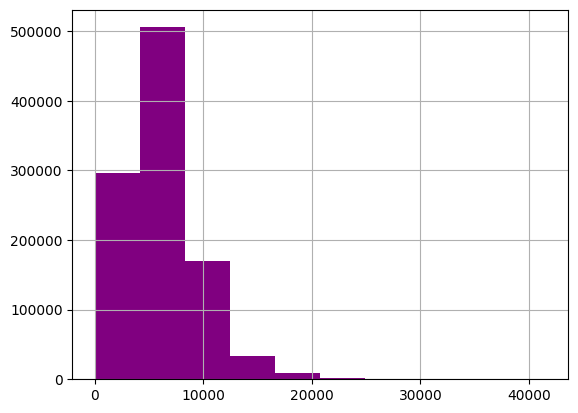

In [ ]:
pd.Series(final1['Sales'],).hist(color = 'purple')
plt.show()

In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

## Observation:
It can be seen that there is quite a lot of zero value.

This zero value needs to be addressed. The value zero can be dropped assuming that the stores were closed on a particular days which could explain zero sales.

In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:
new_df.shape

(844392, 18)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


  We need Dummy values for 'PromoInterval' which will create binary values in new columns. They might skew the model with their some of the high numerical values.

In [ ]:
new_df = pd.get_dummies(new_df, columns = ['PromoInterval'])

In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [ ]:
# Making copies
new_df.to_csv('cleandata.csv', index = False)

In [ ]:
final1.to_csv('cleandata1.csv', index = False)

# **Hypothesis Testing**

### Hypothesis 1:
Model 1 with values of Sales = 0 will be Excluded


### Hypothesis 2:
Model 2 having full dataset(final1)

# **Machine Learning Model Implementation**

## Model Training

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.metrics import r2_score

## Model 1
Rows with Sales = '0' being exculded.

In [ ]:
# Defining dependent variable
dependent_variables = 'Sales'

# Defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear', 'Date', 'Sales']))

In [ ]:
# List of independent variables
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Creating data for dependent(y) and independent variable(x)
X = new_df[independent_variables].values
y = new_df[dependent_variables].values

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


### **Linear Regression**

In [ ]:
# Training the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Checking Regression Coefficients
reg.coef_

array([-1.61160602e-01, -6.85548194e+01,  6.35504984e+00, -6.79767354e-12,
        1.29645838e+03, -1.28102415e+03,  3.62329515e+01,  2.76744096e+02,
        2.22217335e+02,  2.88849353e-02,  2.99491278e+01,  8.39884213e-02,
       -4.31860944e+01,  1.24902145e+01,  4.31860944e+01,  3.16962854e+01,
        1.38838509e+02, -2.13720889e+02])

In [ ]:
# Checking B0 value or the intercept
reg.intercept_

700.1749140828606

In [ ]:
# Checking Regression Score(R-square value)
reg.score(X_train, y_train)

0.7635183725690666

In [ ]:
# Predicting dependent variable from the test dataset which is 20% of the total dataset
y_pred = reg.predict(X_test)
y_pred

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [ ]:
# original test data
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [ ]:
# Predicted train data
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [ ]:
# Calculating MSE and RMSE for test prediction
MSE = mean_squared_error(y_test, y_pred)
print("MSE : ", MSE)

RMSE = np.sqrt(MSE)
print("RMSE : ", RMSE)

MSE :  2265528.631712661
RMSE :  1505.1673102059656


In [ ]:
# R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score : ", r2)

R2 score :  0.7634783399226589


In [ ]:
# Adjusted R2
print("Adjusted_R2 : ", 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted_R2 :  0.7634531273804264


In [ ]:
# for comparing values side by side
act_pred_comp = pd.DataFrame(zip(y_test, y_pred), columns = ['Actual', 'Predicted'])
act_pred_comp.head(10)

,Actual,Predicted
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
5,2742,4530.837902
6,8083,7251.572623
7,2483,3585.646675
8,4149,4241.937979
9,7853,8627.001575


### **Lasso Regression**

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
L1 = Lasso(alpha = 1)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_test,y_test)

0.7634248846174092

In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2266040.654689839
RMSE : 1505.3373889895379
R2 : 0.7634248846174092
Adjusted R2 :  0.7633996663769917


In [ ]:
# Using Lasso regression model function
lasso = Lasso()

# range of alpha penalty values
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# performing grid search to find the best alpha value
lasso_cv = GridSearchCV(lasso, parameters, cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
# printing the best values
print(f"The best alpha value is ", lasso_cv.best_params_)
print(f"The best score for Lasso Regression is", lasso_cv.best_score_)

The best alpha value is  {'alpha': 0.1}
The best score for Lasso Regression is 0.7634990590024255


In [ ]:
y_pred_lasso_cv = lasso_cv.predict(X_test)

In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_lasso_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso_cv)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso_cv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2265536.027639412
RMSE : 1505.1697670493556
R2 : 0.7634775677863688
Adjusted R2 :  0.7634523551618286


In [ ]:
# Comparing actual Vs predicted values
act_pred_comp1 = pd.DataFrame(zip(y_test, y_pred_lasso_cv), columns = ['actual', 'predicted'])
act_pred_comp1.head(10)

,actual,predicted
0,5495,5325.122758
1,5472,4851.024615
2,7969,7238.427738
3,7384,6084.188104
4,13212,7828.881596
5,2742,4530.756365
6,8083,7250.944801
7,2483,3585.716239
8,4149,4241.870709
9,7853,8625.915961


### **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
L2 = Ridge(alpha = 0.78)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.78)

In [ ]:
L2.score(X_train, y_train)

0.7635183724678591

In [ ]:
y_pred_L2 = L2.predict(X_test)

In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_L2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_L2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_L2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2265528.6833741125
RMSE : 1505.1673273673305
R2 : 0.7634783345291927
Adjusted R2 :  0.7634531219863852


In [ ]:
# using ridge regression function
ridge = Ridge()

# Defining alpha penalty value range for grid search
parameters = {'alpha': [0.01, 0.1, 0.3, 0.5, 1]}

# performing Grid Search to get an optimal alpha value
ridge_cv = GridSearchCV(ridge, parameters, cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.3, 0.5, 1]})

In [ ]:
y_pred_ridge_cv = ridge_cv.predict(X_test)

In [ ]:
# printing the best values
print(f"The best alpha value is ", ridge_cv.best_params_)
print(f"The best score for Lasso Regression is", ridge_cv.best_score_)

The best alpha value is  {'alpha': 1}
The best score for Lasso Regression is 0.7634994647477027


In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_ridge_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge_cv)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge_cv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2265528.698280843
RMSE : 1505.167332319182
R2 : 0.7634783329729269
Adjusted R2 :  0.7634531204299535


In [ ]:
# Comparing actual Vs predicted values
act_pred_comp2 = pd.DataFrame(zip(y_test, y_pred_ridge_cv), columns = ['actual', 'predicted'])
act_pred_comp1.head(10)

,actual,predicted
0,5495,5325.122758
1,5472,4851.024615
2,7969,7238.427738
3,7384,6084.188104
4,13212,7828.881596
5,2742,4530.756365
6,8083,7250.944801
7,2483,3585.716239
8,4149,4241.870709
9,7853,8625.915961


### **Elastic-Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.3, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.3)

In [ ]:
elasticnet.score(X_train, y_train)

0.7564784537045577

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2330819.9429225307
RMSE : 1526.7023098569448
R2 : 0.7566619134605
Adjusted R2 :  0.7566359743064215


In [ ]:
# define the Elastic Net model
elastic_net = ElasticNet()

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [ ]:
y_pred_en_cv = elastic_net_cv.predict(X_test)

In [ ]:
# printing the best values
print(f"The best alpha value is ", elastic_net_cv.best_params_)
print(f"The best score for Lasso Regression is", elastic_net_cv.best_score_)

The best alpha value is  {'alpha': 0.1, 'l1_ratio': 0.9}
The best score for Lasso Regression is 0.7631623015682307


In [ ]:
# Calculating scores
MSE  = mean_squared_error(y_test, y_pred_en_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en_cv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2268641.5859817853
RMSE : 1506.2010443436113
R2 : 0.7566619134605
Adjusted R2 :  0.7631280996643066


## **Model 2**
Using full dataset for Regression

Changing values in 'PromoInterval' column to dummy variables inorder to have binary values and not have any biases

In [ ]:
final1 = pd.get_dummies(final1, columns = ['PromoInterval'])

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [ ]:
# Defining dependent variable
dep_var = 'Sales'

# Defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])

In [ ]:
# Checking the columns
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
# Creating the dataset for independent variable
U = final1[indep_var].values

# Creating the dataset for dependent variable
V = final1[dep_var].values

In [ ]:
final1[indep_var].head()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0


In [ ]:
final1[indep_var].tail()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0
1017208,2,0,0,0,1,1,3,2,5350,1,0,1,22,0,0,0,1


In [ ]:
# Using train split to make train and test dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size = 0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


### **Linear Regression**

In [ ]:
# Scaling values in-order to eliminate error while modeling
scaler = StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# Performing linear regression using the above data
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred = linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [ ]:
linear_regression.score(U_train, v_train)

0.8677978490444807

In [ ]:
# Forming a Dataframe for comparing the values
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'predicted'])
regression_Dataframe.head(10)

,actual,predicted
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
5,5646,6322.541147
6,8538,8238.068491
7,5318,6087.798960
8,7018,5932.166147
9,7523,7807.123178


In [ ]:
MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 1944268.5102740775
RMSE : 1394.370291663616
R2 : 0.8684236859866605
Adjusted R2 :  0.8684126902470318


### **Lasso regression**

In [ ]:
L1_1 = Lasso(alpha = 1)

In [ ]:
L1_1.fit(U_train, v_train)

Lasso(alpha=1)

In [ ]:
v_pred_lasso1 = L1_1.predict(U_test)

In [ ]:
L1_1.score(U_test,v_test)

0.8684237873700091

In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_lasso1)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_lasso1)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_lasso1))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))


MSE : 1944267.0121590586
RMSE : 1394.3697544622296
R2 : 0.8684237873700091
Adjusted R2 :  0.868412791638853


In [ ]:
# Using Lasso regression model function
lasso = Lasso()

# range of alpha penalty values
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# performing grid search to find the best alpha value
lasso_cv1 = GridSearchCV(lasso, parameters, cv=5)
lasso_cv1.fit(U_train, v_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
# printing the best values
print(f"The best alpha value is ", lasso_cv1.best_params_)
print(f"The best score for Lasso Regression is", lasso_cv1.best_score_)

v_pred_lasso_cv = lasso_cv1.predict(U_test)

The best alpha value is  {'alpha': 0.1}
The best score for Lasso Regression is 0.8677932899505298


In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_lasso_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_lasso_cv)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_lasso_cv))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 1944255.8871884898
RMSE : 1394.3657652095771
R2 : 0.8684245402406199
Adjusted R2 :  0.8684135445723806


### **Ridge Regression**

In [ ]:
L2_1 = Ridge(alpha = 0.78)

In [ ]:
L2_1.fit(U_train, v_train)

Ridge(alpha=0.78)

In [ ]:
L2_1.score(U_train, v_train)

0.8677980735831881

In [ ]:
v_pred_L2 = L2_1.predict(U_test)

In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_L2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_L2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_L2))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 1944255.8120500504
RMSE : 1394.3657382659867
R2 : 0.8684245453255344
Adjusted R2 :  0.86841354965772


In [ ]:
# using ridge regression function
ridge = Ridge()

# Defining alpha penalty value range for grid search
parameters = {'alpha': [0.01, 0.1, 0.3, 0.5, 1]}

# performing Grid Search to get an optimal alpha value
ridge_cv1 = GridSearchCV(ridge, parameters, cv=5)
ridge_cv1.fit(U_train, v_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.3, 0.5, 1]})

In [ ]:
v_pred_ridge_cv = ridge_cv1.predict(U_test)

In [ ]:
# printing the best values
print(f"The best alpha value is ", ridge_cv1.best_params_)
print(f"The best score for Lasso Regression is", ridge_cv1.best_score_)

The best alpha value is  {'alpha': 1}
The best score for Lasso Regression is 0.8677932616857899


In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_ridge_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_ridge_cv)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_ridge_cv))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 1944255.8304853914
RMSE : 1394.3657448766417
R2 : 0.8684245440779421
Adjusted R2 :  0.8684135484100235


### **Elastic-Net Regression**

In [ ]:
elasticnet = ElasticNet(alpha=0.3, l1_ratio=0.5)

In [ ]:
elasticnet.fit(U_train,v_train)

ElasticNet(alpha=0.3)

In [ ]:
elasticnet.score(U_train, v_train)

0.8559222823122706

In [ ]:
v_pred_en = elasticnet.predict(U_test)

In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_en))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 2126449.970612007
RMSE : 1458.2352247192518
R2 : 0.856094748442199
Adjusted R2 :  0.8560827223819678


In [ ]:
# define the Elastic Net model
elastic_net = ElasticNet()

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv1 = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv1.fit(U_train, v_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [ ]:
v_pred_en_cv = elastic_net_cv1.predict(U_test)

In [ ]:
# printing the best values
print(f"The best alpha value is ", elastic_net_cv1.best_params_)
print(f"The best score for Lasso Regression is", elastic_net_cv1.best_score_)

The best alpha value is  {'alpha': 0.1, 'l1_ratio': 0.9}
The best score for Lasso Regression is 0.867707624947746


In [ ]:
# Calculating scores
MSE  = mean_squared_error(v_test, v_pred_en_cv)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(v_test, v_pred_en_cv))*((U_test.shape[0]-1)/(U_test.shape[0]-U_test.shape[1]-1)))

MSE : 1946183.219277518
RMSE : 1395.056708265839
R2 : 0.7566619134605
Adjusted R2 :  0.8682831035127967


## **Conclusion**

*   After working on Rossmann Store dataset it can be seen that most of the columns do relate with sales column and is helpful in predictive modeling.
*   Taking two hypothesis model where (H0)sales value is having values = 0 provided more information to the Machine learning model as compared where sales value with values 0  being eliminated.
*   When taken with only Sales values not equal to zero a maximum of **76%** was obatained.
*   When working with sales data with value = 0 as well, a much higher efficiency of **86.8%** was obtained, further proving the point that all values were important in sales column for precise prediction.
*   Sales value equal to 0 had a total of **172817** rows which is quite a large number and hence it could be seen why they played an important role in prediction model and are neccessary for ML model.
*   The scope of ML model was Linear Regression here along with Lasso, Ridge and ElasticNet Regression which produced a maximun of  **86.8%** but if other ML models were used like Random forest or any other complex model then the efficiency could have been higher.

